In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer # Usaremos o SimpleImputer para a média
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB # Importamos o modelo Gaussian Naive Bayes
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 1. Carregamento e Limpeza Inicial 
df = pd.read_csv('heart.csv')
df.columns = df.columns.str.strip()
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
X['FastingBS'] = X['FastingBS'].astype(str)

In [ ]:
# 2. Construção do Pipeline para Naive Bayes

# Pipeline para features NUMÉRICAS:
# Passo 1: Imputar dados ausentes com a MÉDIA da coluna.
# Passo 2: Normalizar os dados (opcional para Naive Bayes, mas bom para consistência).
numeric_transformer_nb = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline para features CATEGÓRICAS 
categorical_transformer_nb = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# Combinar os pipelines
preprocessor_nb = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_nb, numerical_features),
        ('cat', categorical_transformer_nb, categorical_features)
    ],
    remainder='passthrough'
)

# Aplicar o pipeline de pré-processamento
X_processed_nb = preprocessor_nb.fit_transform(X)


--- Dados pré-processados com a estratégia para Naive Bayes ---



In [5]:
# --- 3. Divisão, Treinamento e Avaliação ---

# 3.1 Divisão dos Dados em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X_processed_nb, y, test_size=0.2, random_state=42, stratify=y)
print(f"Dados divididos em {X_train.shape[0]} amostras de treino e {X_test.shape[0]} de teste.\n")

Dados divididos em 734 amostras de treino e 184 de teste.



In [ ]:
# 3.2 Treinamento do Modelo Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

--- Modelo Naive Bayes treinado com sucesso! ---



In [7]:
# 3.3 Previsões e Avaliação no Conjunto de Teste
y_pred_nb = nb_model.predict(X_test)

# Calcular as métricas de performance
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print("--- Métricas de Avaliação do Modelo Naive Bayes ---")
print(f"Acurácia: {accuracy_nb:.4f}")
print(f"Precisão: {precision_nb:.4f}")
print(f"Recall (Sensibilidade): {recall_nb:.4f}")
print(f"F1-Score: {f1_nb:.4f}\n")

# Relatório de Classificação
print("--- Relatório de Classificação ---")
print(classification_report(y_test, y_pred_nb, target_names=['Não Doente (0)', 'Doente (1)']))


--- Métricas de Avaliação do Modelo Naive Bayes ---
Acurácia: 0.8750
Precisão: 0.9072
Recall (Sensibilidade): 0.8627
F1-Score: 0.8844

--- Relatório de Classificação ---
                precision    recall  f1-score   support

Não Doente (0)       0.84      0.89      0.86        82
    Doente (1)       0.91      0.86      0.88       102

      accuracy                           0.88       184
     macro avg       0.87      0.88      0.87       184
  weighted avg       0.88      0.88      0.88       184



--- Matriz de Confusão ---


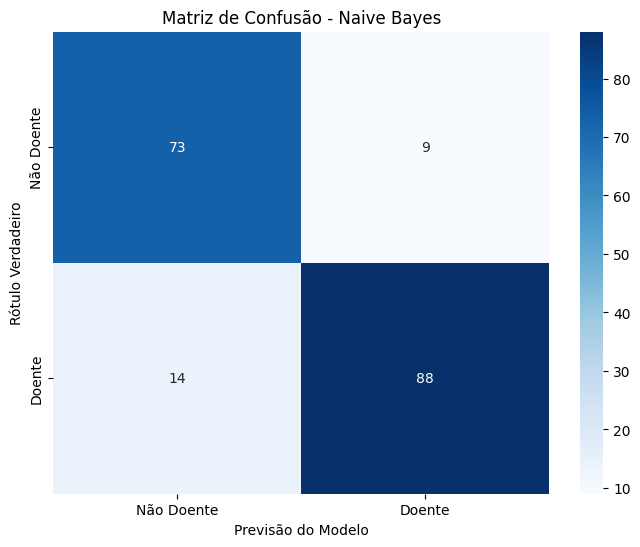

In [9]:
# 3.4 Visualização da Matriz de Confusão
print("--- Matriz de Confusão ---")
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Não Doente', 'Doente'], 
            yticklabels=['Não Doente', 'Doente'])
            
plt.xlabel('Previsão do Modelo')
plt.ylabel('Rótulo Verdadeiro')
plt.title('Matriz de Confusão - Naive Bayes')
plt.show()